# Topic Modelling

### Latent Semantic Analysis / Latent Semantic Indexing

In [1]:
from gensim import corpora # Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

In [2]:
import re

In [3]:
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    x = re.sub(pattern,'', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}' , '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}','##', x)
        return x

def clean(x):
    x = clean_text(x)
    x = clean_numbers(x)
    return x


In [4]:
from pathlib import Path
from bs4 import BeautifulSoup

def load_articles(data_dir):
    reuters = Path(data_dir)
    for path in reuters.glob('*.sgm'):   # Standard Generalized Markup Language
        with path.open() as sgm_file:
            contents = sgm_file.read()
            soup = BeautifulSoup(contents)
            for article in soup.find_all('body'):
                yield article.text

def load_documents(document_dir):
    print(f'Loading from {document_dir}')
    documents = list(load_articles(document_dir))
    print(f'Loaded {len(documents)} documents')
    return documents

def prepare_documents(documents):
    print('Preparing documents')
    documents = [clean(document) for document in documents]
    documents = [preprocess_string(doc) for doc in documents]
    return documents

def create_lsa_model(documents, dictionary, number_of_topics):
    print(f'Creating LSA Model with {number_of_topics} topics')
    document_terms = [dictionary.doc2bow(doc) for doc in documents]
    return LsiModel(document_terms, num_topics=number_of_topics, id2word = dictionary)

def run_lsa_process(documents, number_of_topics=10):
    documents = prepare_documents(documents)
    dictionary = corpora.Dictionary(documents)
    lsa_model = create_lsa_model(documents, dictionary, number_of_topics)
    return documents, dictionary, lsa_model

In [6]:
# data directory 
articles = list(load_articles(r"C:\Users\Swapnil Mishra\Desktop\DS\Text Mining\Topic Modeling-LSA\lsa_data"))
documents, dictionary, model = run_lsa_process(articles, number_of_topics=5)

model.print_topics()
model

Preparing documents
Creating LSA Model with 5 topics



Calculating coherence for 5 topics
Preparing documents
Creating LSA Model with 5 topics

Calculating coherence for 6 topics
Preparing documents
Creating LSA Model with 6 topics

Calculating coherence for 7 topics
Preparing documents
Creating LSA Model with 7 topics

Calculating coherence for 8 topics
Preparing documents
Creating LSA Model with 8 topics

Calculating coherence for 9 topics
Preparing documents
Creating LSA Model with 9 topics

Calculating coherence for 10 topics
Preparing documents
Creating LSA Model with 10 topics


Text(0.5, 1.0, 'Coherence Scores by number of Topics')

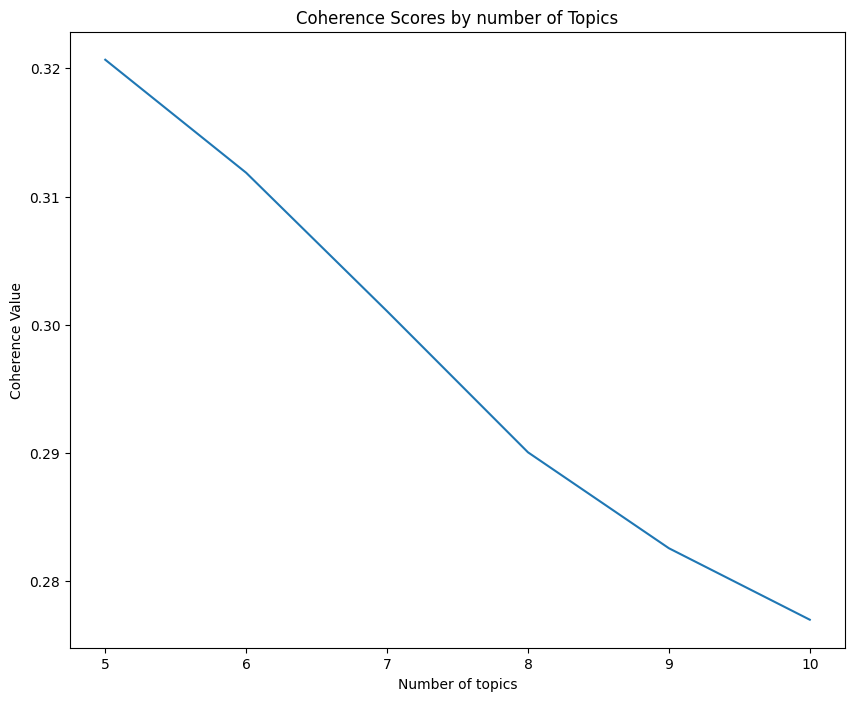

In [7]:
# Coherence Model
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()


def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        documents, dictionary, model = run_lsa_process(articles, number_of_topics=num_topics)
        coherence = calculate_coherence_score(documents, dictionary, model)
        yield coherence

min_topics, max_topics = 5, 11

coherence_scores = list(get_coherence_values(min_topics, max_topics))
documents

## Plot
import matplotlib.pyplot as plt

# get_ipython().run_line_magic('matplotlib', 'inline')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,8))
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')
